In [50]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score,roc_curve,roc_auc_score

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [51]:
df= pd.read_csv('df_after_scale.csv')

In [52]:
df.head()

,State,Acc_len,Area_code,Int_plan,Vmail_plan,Vmail_message,Day_min,Day_calls,Day_charge,Eve_mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,Int_mins,Int_calls,Int_charge,Custserv_calls,Churn
0,0,0.690901,415,0,1,1.261885,1.568293,0.500261,1.568569,-0.059921,-0.059527,-0.059742,0.872135,-0.448712,0.871418,-0.101301,-0.583487,-0.102005,-0.433885,0
1,0,0.160503,415,0,1,1.335463,-0.349166,1.154156,-0.349447,-0.097506,0.142298,-0.096978,1.064069,0.153308,1.064889,1.240707,-0.583487,1.241481,-0.433885,0
2,0,0.918214,415,0,0,-0.577587,1.166275,0.701460,1.166439,-1.567294,0.495492,-1.567818,-0.752381,0.203477,-0.751101,0.696649,0.230398,0.690651,-1.199068,0
3,0,-0.420409,408,1,0,-0.577587,2.203741,-1.461423,2.203911,-2.740354,-0.614545,-2.740765,-0.073686,-0.549048,-0.073952,-1.334498,1.044284,-1.338013,0.331298,0
4,0,-0.647723,415,1,0,-0.577587,-0.254682,0.651160,-0.254636,-1.031207,1.100966,-1.030217,-0.271556,1.056338,-0.271820,-0.065031,-0.583487,-0.061701,1.096480,0


In [4]:
X = df.drop('Churn',axis=1)
y=df.Churn

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(Counter(y_train))
print(Counter(y_test))

(3231, 19)
(1386, 19)
Counter({0: 2761, 1: 470})
Counter({0: 1200, 1: 186})


In [7]:
sm = SMOTE()
X_train_sm,y_train_sm = sm.fit_sample(X_train,y_train)

In [8]:
# now the chuners and non chuners ratio is same in the output
print(Counter(y_train_sm))
print(Counter(y_test))

Counter({0: 2761, 1: 2761})
Counter({0: 1200, 1: 186})


In [24]:
model = RandomForestClassifier(n_estimators=9,
 max_features='sqrt',
 max_depth=9,
 criterion='gini',
 bootstrap=False)

model.fit(X_train_sm,y_train_sm)


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=9, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
y_pred_rf= model.predict(X_test)

In [26]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1200
           1       0.80      0.82      0.81       186

   micro avg       0.95      0.95      0.95      1386
   macro avg       0.88      0.89      0.89      1386
weighted avg       0.95      0.95      0.95      1386



In [ ]:
# got a recall of 82% and precison of 80% at a particular trial

In [27]:
accuracy_score(y_test,y_pred_rf)

0.9473304473304474

In [28]:
confusion_matrix(y_test,y_pred_rf)

array([[1161,   39],
       [  34,  152]])

## Grid Search Method

In [29]:
params= {'n_estimators':np.arange(1,10),
         'criterion': ['entropy','gini'],
          'max_features':['auto','sqrt','log2'],
         'bootstrap':[True,False]
          }

In [30]:
model_cv=RandomizedSearchCV(RandomForestClassifier(),params)
#model_cv =GridSearchCV(RandomForestClassifier(),params)

In [31]:
model_cv.fit(X_train_sm,y_train_sm)

/Users/muralijajula/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'criterion': ['entropy', 'gini'], 'max_features': ['auto', 'sqrt', 'log2'], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [32]:
model_cv.best_params_

{'n_estimators': 9,
 'max_features': 'auto',
 'criterion': 'entropy',
 'bootstrap': False}

In [34]:
model_cv.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=9, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)


## ROC CURVE

In [35]:
#checking for the ROC - CHECK FOR EFFICIENCY OF THE MODEL
model.predict_proba(X_test)

array([[0.94061303, 0.05938697],
       [0.14574039, 0.85425961],
       [0.68891044, 0.31108956],
       ...,
       [0.83596436, 0.16403564],
       [0.44120172, 0.55879828],
       [0.74610756, 0.25389244]])

In [36]:
#EXTRACTING ONLY the 2nd column values as it the predict proba values for the churners
y_pred_prob=model.predict_proba(X_test)[:,1]
print(y_pred_prob)

[0.05938697 0.85425961 0.31108956 ... 0.16403564 0.55879828 0.25389244]


In [37]:
fpr, tpr , thresholds = roc_curve(y_test,y_pred_prob)

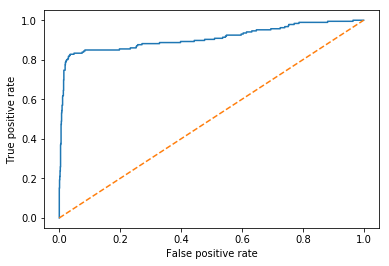

In [38]:
plt.plot(fpr,tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.plot([0,1],[0,1],"--")
plt.show()

In [ ]:
## The default probabilty threshold is 50% 

In [ ]:
# checking the area under the curve - for a default random model AUC - 0.5 
#So, we make sure we get better AUC score for a better performing model

In [39]:
auc = roc_auc_score(y_test,y_pred_prob)

In [40]:
print(auc)

0.909171146953405


### FROM THE Above result we can see the area under the curve is 90% which indicates the model is pretty good for the predictions further

In [41]:
importances= model.feature_importances_
sort=np.argsort(importances)
label=X.columns[sort]


In [42]:
X.shape
ss= range(X.shape[1])
print(ss)

range(0, 19)


<BarContainer object of 19 artists>

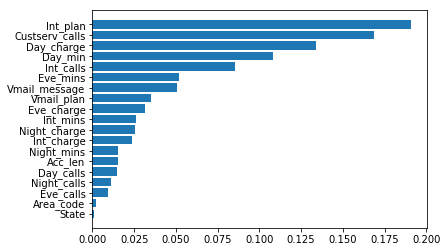

In [43]:
plt.barh(ss,importances[sort],tick_label=label)

### The above figure shows the feature importances for the particular model.and which features drive churn the most

In [48]:
from sklearn.externals import joblib

In [49]:
joblib.dump(model,'Telecom_trained_model.ml')

['Telecom_trained_model.ml']

In [ ]:
#to load the trained model
model=joblib.load('Telecom_trained_model.ml')